# Data Analysis and Visualisation with Players Market value

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and inspecting the data

In [4]:
#Reading cvs file

players_df=pd.read_csv('Python_project/players.csv', encoding='unicode_escape')

In [5]:
colnames= list(players_df.columns)
print(colnames)

['Unnamed: 0', 'Name', 'Position', 'Age', 'Markey Value In Millions(Â£)', 'Country', 'Club', 'Matches', 'Goals', 'Own Goals', 'Assists', 'Yellow Cards', 'Second Yellow Cards', 'Red Cards', 'Number Of Substitute In', 'Number Of Substitute Out']


In [6]:
players_df.tail()

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(Â£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze PÃ©rez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2
499,499,Aritz Elustondo,Centre-Back,27,16.2,Spain,Real Sociedad,15,3,0,1,4,0,0,1,1


Using data from Transfermarkt as at 2021, we analyse football players and their market value globally.

In [7]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    500 non-null    int64  
 1   Name                          500 non-null    object 
 2   Position                      500 non-null    object 
 3   Age                           500 non-null    int64  
 4   Markey Value In Millions(Â£)  500 non-null    float64
 5   Country                       500 non-null    object 
 6   Club                          500 non-null    object 
 7   Matches                       500 non-null    int64  
 8   Goals                         500 non-null    int64  
 9   Own Goals                     500 non-null    int64  
 10  Assists                       500 non-null    int64  
 11  Yellow Cards                  500 non-null    int64  
 12  Second Yellow Cards           500 non-null    int64  
 13  Red C

# Data Cleaning

In [8]:

# Checking the data
pd.isnull(players_df).sum()

Unnamed: 0                      0
Name                            0
Position                        0
Age                             0
Markey Value In Millions(Â£)    0
Country                         0
Club                            0
Matches                         0
Goals                           0
Own Goals                       0
Assists                         0
Yellow Cards                    0
Second Yellow Cards             0
Red Cards                       0
Number Of Substitute In         0
Number Of Substitute Out        0
dtype: int64

In [9]:
#Renaming Variables
players_df.rename(columns={'Markey Value In Millions(Â£)': 'market_value', 'Number Of Substitute In': 'substitutions', 'Number Of Substitute Out': 'Substituted' }, inplace=True)

In [10]:
players_df.head()

,Unnamed: 0,Name,Position,Age,market_value,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,substitutions,Substituted
0,0,Kylian MbappÃ©,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3


In [11]:
players_df.tail()

,Unnamed: 0,Name,Position,Age,market_value,Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,substitutions,Substituted
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze PÃ©rez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2
499,499,Aritz Elustondo,Centre-Back,27,16.2,Spain,Real Sociedad,15,3,0,1,4,0,0,1,1


# Exploratory Analysis

In [12]:
players_df[['Age', 'market_value', 'Matches', 'Goals']].describe()

,Age,market_value,Matches,Goals
count,500.000000,500.000000,500.000000,500.000000
mean,24.968000,31.537800,12.396000,2.160000
std,3.165916,17.577697,4.342453,2.880102
min,16.000000,16.200000,0.000000,0.000000
25%,23.000000,19.800000,10.000000,0.000000
50%,25.000000,25.200000,13.000000,1.000000
75%,27.000000,36.000000,16.000000,3.000000
max,36.000000,144.000000,24.000000,23.000000


The average age of the players in the dataset is about 25 years with a median and the highest market value of 25.2 Million dollars and 144 million Dollars respectively.

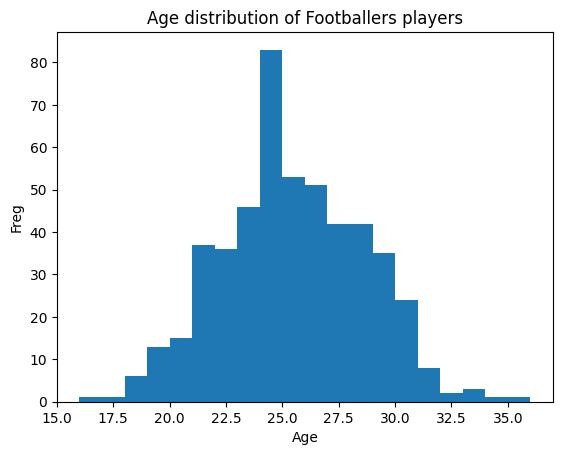

In [13]:
plt.hist(players_df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Freg')
plt.title("Age distribution of Footballers players")
plt.show()

Out of the 500 players, 80 of them are aged 25 years

# Position Distribution

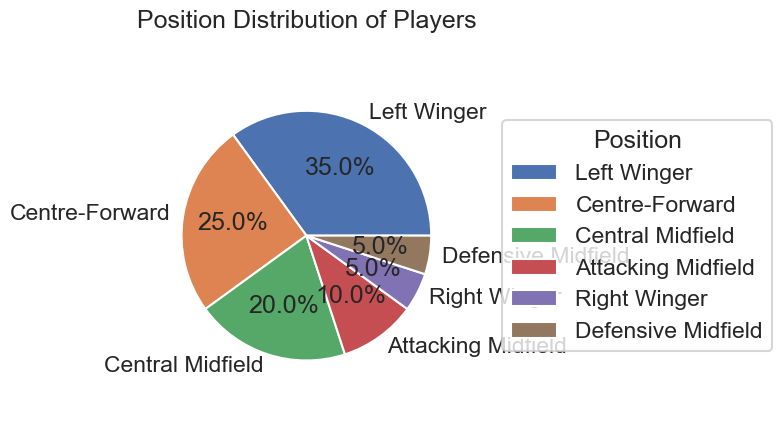

In [100]:
# Position Distribution 

position_counts = top_players['Position'].value_counts()
plt.pie(position_counts,labels=position_counts.index, autopct='%.1f%%')
plt.title('Position Distribution of Players')
plt.axis('equal')
plt.tight_layout()
plt.legend(title="Position",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

NB: We make the pie a bit bigger by increasing figsize and also the autopct argument is used to show the percent value inside each piece of the pie.

Additionally, among the top 20 players, 35% of them are left wingers, 25% are centre-forward with only 5% as defensive midfielders.

<Figure size 1000x600 with 0 Axes>

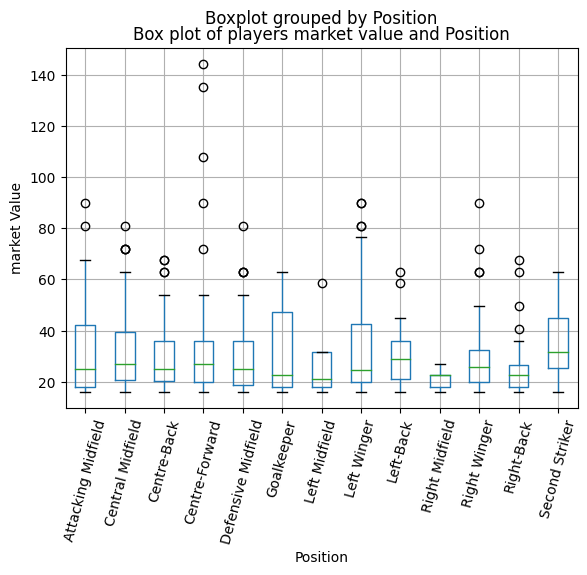

In [14]:
#Box plot
plt.figure(figsize=(10,6))
players_df.boxplot(column='market_value', by='Position')
plt.ylabel('market Value')
plt.xticks(rotation=75)
plt.title("Box plot of players market value and Position")
plt.show()

Centre forward (strikers) players have the highest market value in the transfer market as 25% of them are valued at 20 million dollars and the top 75% are valued around 38 million dollars. Goalkeepers on the other hand has the highest top 75% value of almost 50 million dollars. While right midfielders have the lowest transfer market values in the dataset, left wingers are valued about almost at 80 million dollars on the maximum.

<Figure size 1000x600 with 0 Axes>

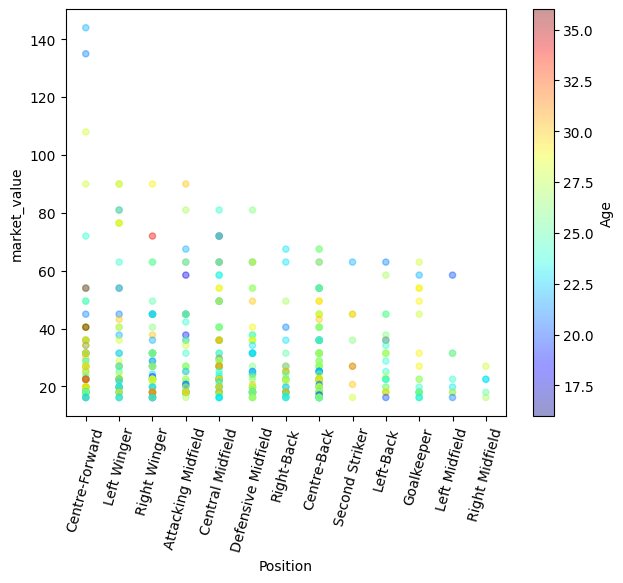

In [15]:
#Scatter plot
plt.figure(figsize=(10,6))
players_df.plot.scatter(x = 'Position', y = 'market_value', c = 'Age', alpha = 0.4,\
                  cmap = plt.get_cmap('jet'), colorbar = True)
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

Goalkeepers market value peak when they are over 25 years. This is true for second strikers. On the contrary, for centre-forward players, their market value peak when they are below 25 years.

In [16]:
top_players=players_df.nlargest(20,"market_value")
print(top_players)

    Unnamed: 0               Name            Position  Age  market_value  \
0            0     Kylian MbappÃ©      Centre-Forward   22         144.0   
1            1     Erling Haaland      Centre-Forward   21         135.0   
2            2         Harry Kane      Centre-Forward   28         108.0   
3            3      Jack Grealish         Left Winger   26          90.0   
4            4      Mohamed Salah        Right Winger   29          90.0   
5            5      Romelu Lukaku      Centre-Forward   28          90.0   
6            6    Kevin De Bruyne  Attacking Midfield   30          90.0   
7            7             Neymar         Left Winger   29          90.0   
8            8       Jadon Sancho         Left Winger   21          81.0   
9            9    Frenkie de Jong    Central Midfield   24          81.0   
10          10    Bruno Fernandes  Attacking Midfield   27          81.0   
11          11     Joshua Kimmich  Defensive Midfield   26          81.0   
12          

Amongst the top 20 most valuable players in the world, the top 3 players are centre-forward. In particular, Kylian Mbappe is the highest valued player in the world, followed by Erling Haaland and Harry Kane valued at 144 millions, 135 million and 108 million dollars respectively.

# Player performance

In [101]:
# Creating new variable contributions in a game
import pandas as pd

top_players['Total_goals'] = top_players['Goals']+top_players['Assists']
print(top_players)

    Unnamed: 0               Name            Position  Age  market_value  \
0            0     Kylian MbappÃ©      Centre-Forward   22         144.0   
1            1     Erling Haaland      Centre-Forward   21         135.0   
2            2         Harry Kane      Centre-Forward   28         108.0   
3            3      Jack Grealish         Left Winger   26          90.0   
4            4      Mohamed Salah        Right Winger   29          90.0   
5            5      Romelu Lukaku      Centre-Forward   28          90.0   
6            6    Kevin De Bruyne  Attacking Midfield   30          90.0   
7            7             Neymar         Left Winger   29          90.0   
8            8       Jadon Sancho         Left Winger   21          81.0   
9            9    Frenkie de Jong    Central Midfield   24          81.0   
10          10    Bruno Fernandes  Attacking Midfield   27          81.0   
11          11     Joshua Kimmich  Defensive Midfield   26          81.0   
12          

In [102]:
# Estimating Goals per game as an indicator for player performance
top_players['goals_per_game'] = top_players['Total_goals']/top_players['Matches']
print(top_players)

    Unnamed: 0               Name            Position  Age  market_value  \
0            0     Kylian MbappÃ©      Centre-Forward   22         144.0   
1            1     Erling Haaland      Centre-Forward   21         135.0   
2            2         Harry Kane      Centre-Forward   28         108.0   
3            3      Jack Grealish         Left Winger   26          90.0   
4            4      Mohamed Salah        Right Winger   29          90.0   
5            5      Romelu Lukaku      Centre-Forward   28          90.0   
6            6    Kevin De Bruyne  Attacking Midfield   30          90.0   
7            7             Neymar         Left Winger   29          90.0   
8            8       Jadon Sancho         Left Winger   21          81.0   
9            9    Frenkie de Jong    Central Midfield   24          81.0   
10          10    Bruno Fernandes  Attacking Midfield   27          81.0   
11          11     Joshua Kimmich  Defensive Midfield   26          81.0   
12          

<Figure size 1000x600 with 0 Axes>

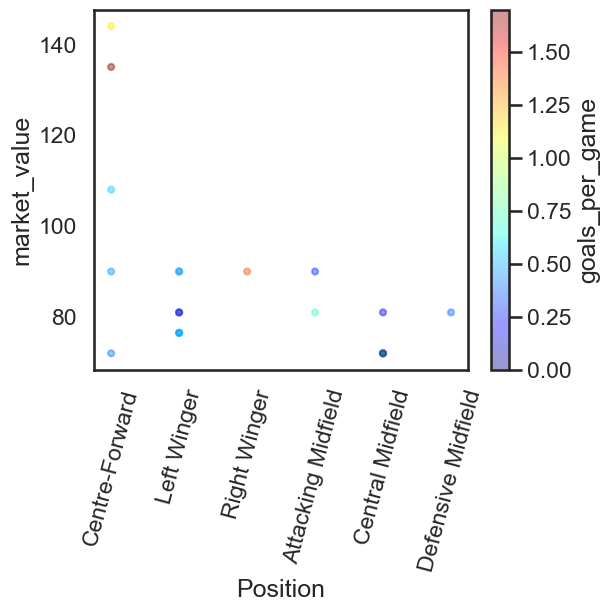

In [105]:
#Scatter plot
plt.figure(figsize=(10,6))
top_players.plot.scatter(x = 'Position', y = 'market_value', c = 'goals_per_game', alpha = 0.4,\
                  cmap = plt.get_cmap('jet'), colorbar = True)
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

Among players with higher market value, centre-forwaders with higher goal contribution per game has more market value same is true for wingers and attacking midfielders.


# Expected Earnings from Player sales

We use the market value of player as the potential earning for their clubs.



In [18]:
# Total Earnings of top players clubs
team_avg_earning=top_players.groupby('Club')['market_value'].mean()
print(team_avg_earning)

Club
AtlÃ©tico de Madrid     72.00
Bayern Munich           81.00
Borussia Dortmund      135.00
Chelsea FC              90.00
FC Barcelona            76.50
Inter Milan             72.00
Liverpool FC            83.25
Manchester City         83.25
Manchester United       79.50
Paris Saint-Germain    117.00
Tottenham Hotspur       92.25
Name: market_value, dtype: float64


 On the potential earnings to the club with the top 20 players, all the clubs with the highest expected earnings from player sales are in the top 4 leagues i.e., German Bundesliga, French ligue 1, English Premier League and the Spanish Laliga.

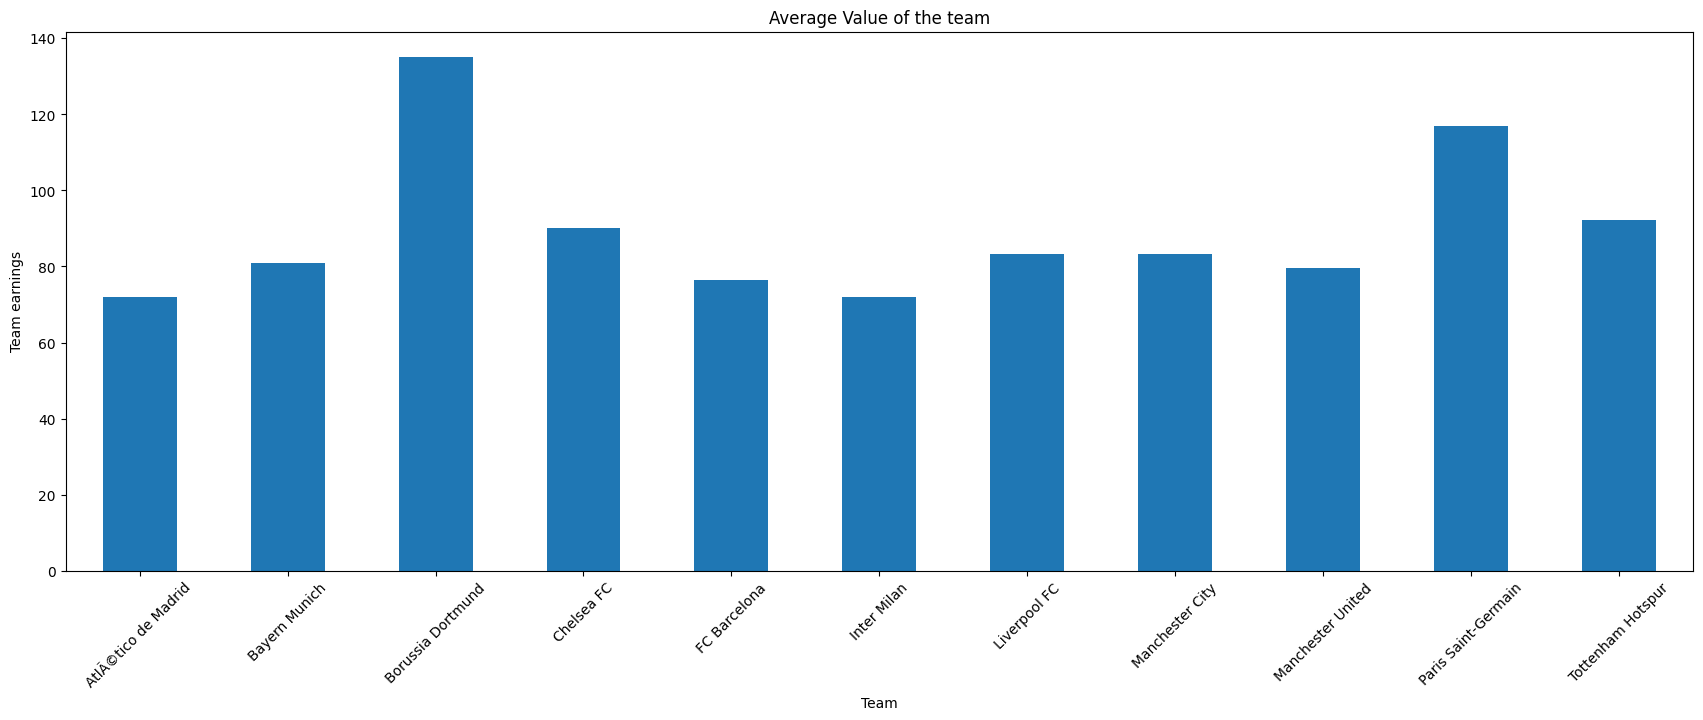

In [19]:
#Bar chart
plt.figure(figsize=(21,7))
team_avg_earning.plot(kind='bar')
plt.ylabel('Team earnings')
plt.xlabel('Team')
plt.title("Average Value of the team")
plt.xticks(rotation=45)
plt.show()

In the German Bundesliga, Borussia Dortmund has the average expected earnings of 135 million dollars from their players, followed by Bayern Munich. PSG is the only French team among the top potential earners with 117 million dollars. Tottenham Hotspurs is the English club with the highest expected earnings from player sales with a mean earnings of 92 million dollars, followed by Chelsea with 90 million, Liverpool and Manchester City with 83 million. While Real Madrid and Barcelona are the most top rated club in Laliga, Barcelona and Athletico Madrid are the teams with the highest potential earnings of 76 million and 72 million respectively.

In [20]:
df2=players_df.groupby(['Club'])['market_value'].sum().sort_values(ascending=False).head(20)
print(df2)


Club
Manchester City        940.5
Paris Saint-Germain    775.8
Manchester United      760.5
Chelsea FC             709.2
Bayern Munich          685.8
Liverpool FC           681.3
AtlÃ©tico de Madrid    616.5
Real Madrid            594.0
Tottenham Hotspur      536.4
Juventus FC            450.0
FC Barcelona           450.0
Borussia Dortmund      423.9
Arsenal FC             408.6
Leicester City         387.9
RB Leipzig             379.8
Inter Milan            373.5
AC Milan               358.2
SSC Napoli             353.7
Everton FC             321.3
Aston Villa            288.9
Name: market_value, dtype: float64


In [21]:
df3=players_df.groupby(['Club'])['market_value'].sum().sort_values(ascending=True).head(20)
print(df3)

Club
Sheffield United                   16.2
Rubin Kazan                        16.2
RCD Espanyol Barcelona             16.2
UD AlmerÃ­a                        16.2
Feyenoord Rotterdam                16.2
Celta de Vigo                      16.2
Red Bull Salzburg                  18.0
UC Sampdoria                       18.0
Getafe CF                          18.0
Club AtlÃ©tico VÃ©lez Sarsfield    18.0
Cagliari Calcio                    18.0
Bologna FC 1909                    18.0
FC Metz                            18.0
Al-Rayyan SC                       18.0
KRC Genk                           19.8
Dynamo Kyiv                        22.5
Stade Rennais FC                   23.4
Watford FC                         24.3
Torino FC                          31.5
Club AtlÃ©tico River Plate         34.2
Name: market_value, dtype: float64


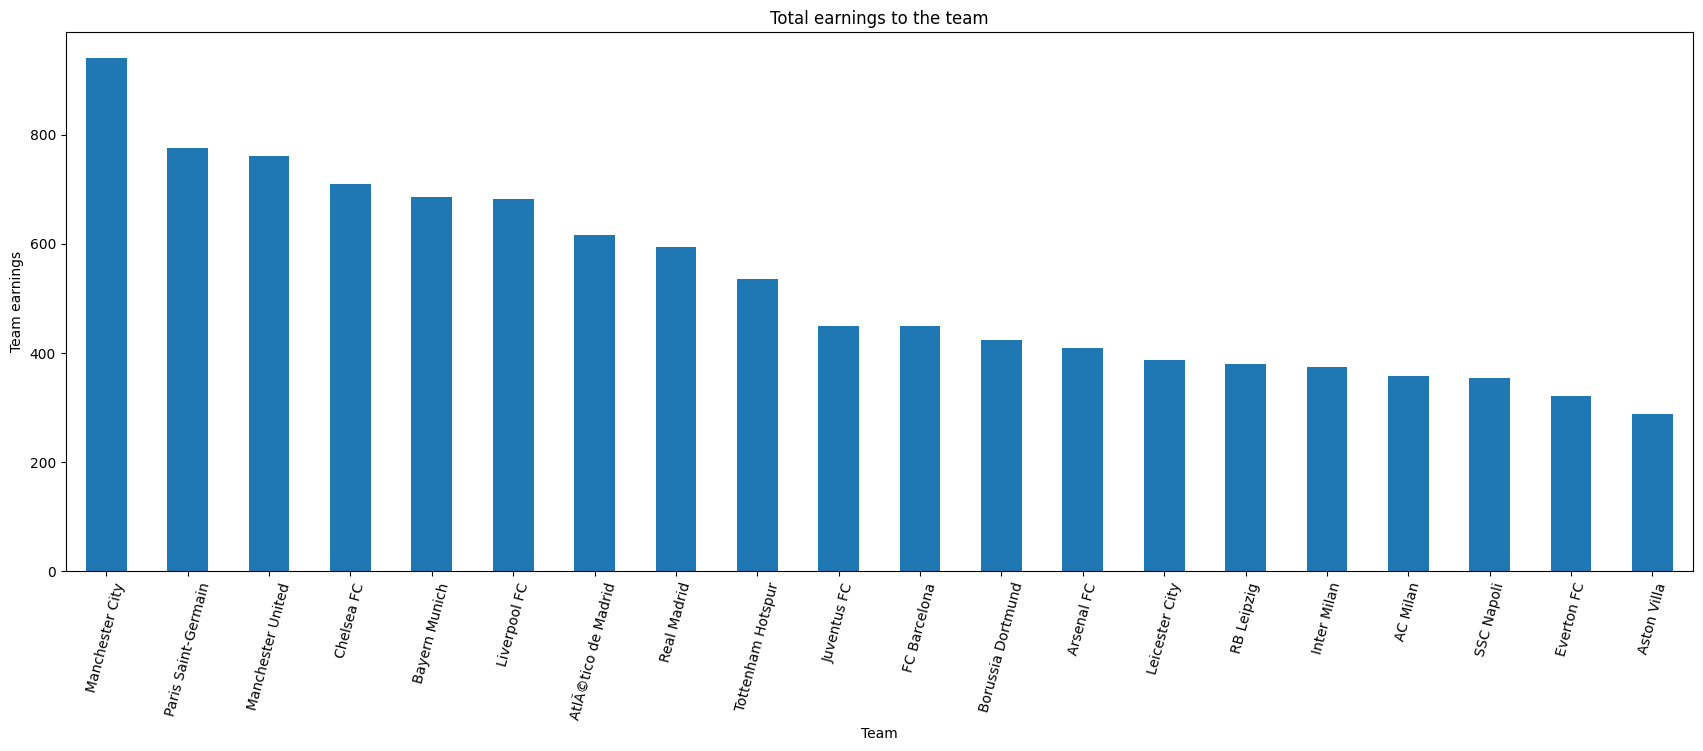

In [22]:
#Bar chart
plt.figure(figsize=(21,7))
df2.plot(kind='bar')
plt.ylabel('Team earnings')
plt.xlabel('Team')
plt.title("Total earnings to the team")
plt.xticks(rotation=75)
plt.show()

On the potential earnings from player sales, Manchester City with 940 million dollars will be the top earners from player sales considering the total market value of their players. RB Leipzig, Everton FC and Aston Villa are the only not top teams amongst the 20 top earners.

In [110]:
top_countries=players_df.groupby(['Country'])['market_value'].sum().sort_values(ascending=False).head(20)
print(top_countries)


Country
England          2248.2
France           1895.4
Spain            1565.1
Brazil           1275.3
Germany          1005.3
Portugal          890.1
Italy             854.1
Argentina         650.7
Netherlands       571.5
Belgium           522.9
Uruguay           287.1
Cote d'Ivoire     218.7
Senegal           211.5
Croatia           207.0
Nigeria           199.8
Norway            187.2
Serbia            166.5
Austria           165.6
Scotland          163.8
Denmark           161.1
Name: market_value, dtype: float64


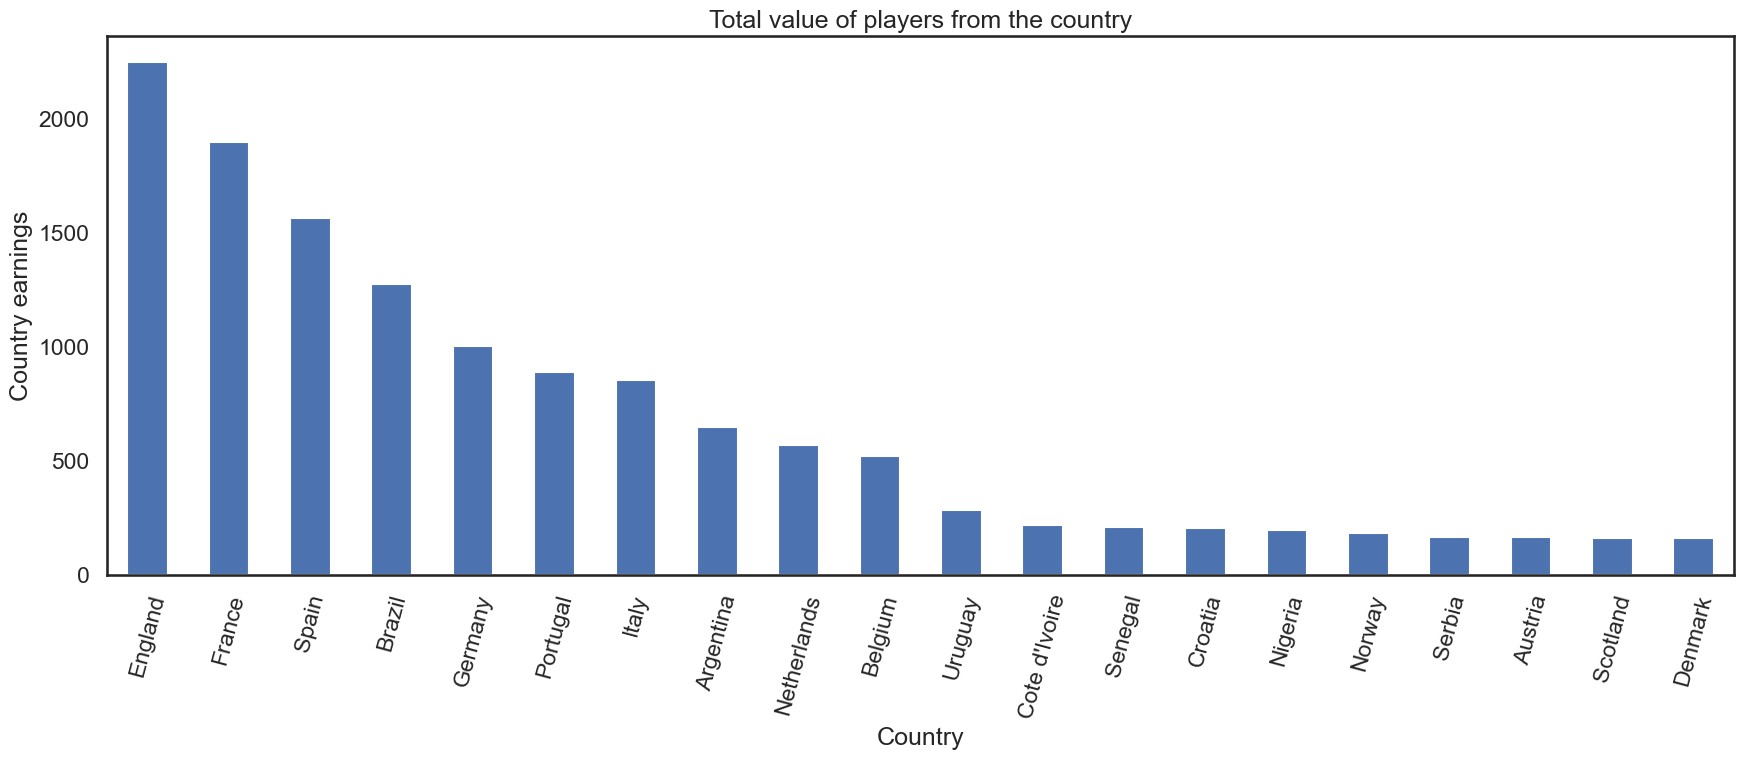

In [114]:
#Bar chart
plt.figure(figsize=(21,7))
top_countries.plot(kind='bar')
plt.ylabel('Country earnings')
plt.xlabel('Country')
plt.title("Total value of players from the country")
plt.xticks(rotation=75)
plt.show()

An estimate of the value of players and their country of origin shows that, players from England has the highest market value, followed by France and Spain. Brazil and Argentina are the only non-European countries whose players are among the top 10 most valuable players (4th and 8th respectively). Similarly, Cote d'Ivoire, Senegal and Nigeria are the only African Countries with players with higher market value among the top 20.

# Conclusion

Football is one of the best recognized entertaining sports on the field and also with monetary investments. Using 2021 data from Transfermarkt, we observe that, the average age of players in the transfer market was 25 years. The top three players with the highest market value are centre-forward - Mbappe, Haaland and Kane respectively. And also, Manchester United, PSG, Man U and Chelsea are the clubs with the highest potential earnings from player sales. While Sheffield United, Rubin Kazan, Espanyol, UD AlmerÃa and Feyenoord Rotterdam are the less valued team in terms of expected player sales.